# STEPS 1-2

## IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## PATH

In [2]:
path = r'C:\Users\gryzu\12.03.2023 Instacart Basket Analysis'

In [3]:
path

'C:\\Users\\gryzu\\12.03.2023 Instacart Basket Analysis'

## IMPORTING COMBINED DATASET

In [4]:
path_to_pickle = os.path.join(path, '02 Data', 'Prepared Data', 'customer_orders_products.pkl')

In [5]:
custs_ords_prods = pd.read_pickle(path_to_pickle)

In [16]:
# Checking a atble
custs_ords_prods.head()

,user_id,first_name,Surnam,gender,state,age,date_joined,number_of_dependants,family_status,income,...,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_days_between_orders,order_frequency,_merge
0,26711,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665,...,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
1,26711,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665,...,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
2,26711,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665,...,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
3,26711,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665,...,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
4,26711,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665,...,Regularly busy,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both


## SUBSETTING THE DATAFRAME

In [17]:
#Creating of Samples
np.random.seed(4)
dev = np.random.rand(len(custs_ords_prods)) <= 0.7

In [11]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [12]:
#Creating of two Dataframe / 70% refers to Big and 30% to Small
big = custs_ords_prods[dev]
small = custs_ords_prods[~dev]

In [13]:
#Checking the shapes 
custs_ords_prods.shape

(32404859, 32)

In [14]:
len(small)

9721098

In [15]:
len(big)

22683761

# STEP 3

## HISTOGRAM OF THE “order_hour_of_day” COLUMN

In [22]:
columns_list = custs_ords_prods.columns

In [23]:
print(columns_list)

Index(['user_id', 'first_name', 'Surnam', 'gender', 'state', 'age',
       'date_joined', 'number_of_dependants', 'family_status', 'income',
       'order_id', 'order_number', 'orders_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'product_name', 'aisle_id', 'department_id', 'prices',
       'busiest_day', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'mean_product_price', 'spending_flag',
       'median_days_between_orders', 'order_frequency', '_merge'],
      dtype='object')


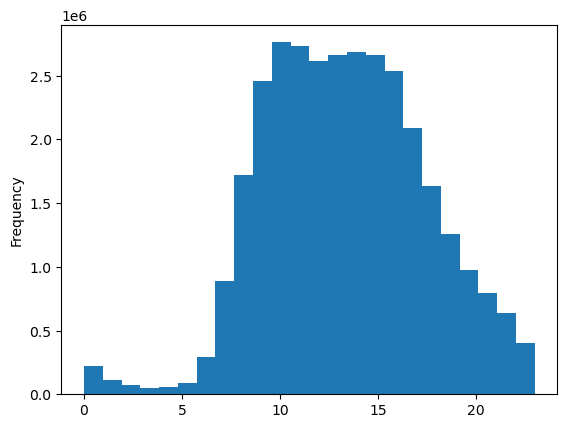

In [25]:
hist_order_hour_of_day = custs_ords_prods['order_hour_of_day'].plot.hist(bins=24)

Text(0.5, 0, 'Hour')

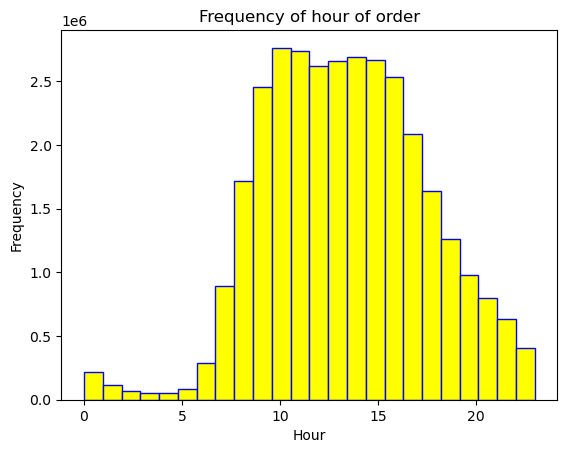

In [36]:
#making the histogram more visiable with names on X and Y axis
hist_order_hour_of_day = custs_ords_prods['order_hour_of_day'].plot.hist(bins=24, color='yellow', edgecolor='blue')
plt.title('Frequency of hour of order')
plt.ylabel('Frequency')
plt.xlabel('Hour')


The busiest order hours are between 10:00 and 15:00

In [37]:
#saving the histogram chart
hist_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day.png'))

# STEP 4

## BAR CHART FROM THE “loyalty_flag” COLUMN

Text(0, 0.5, 'Orders')

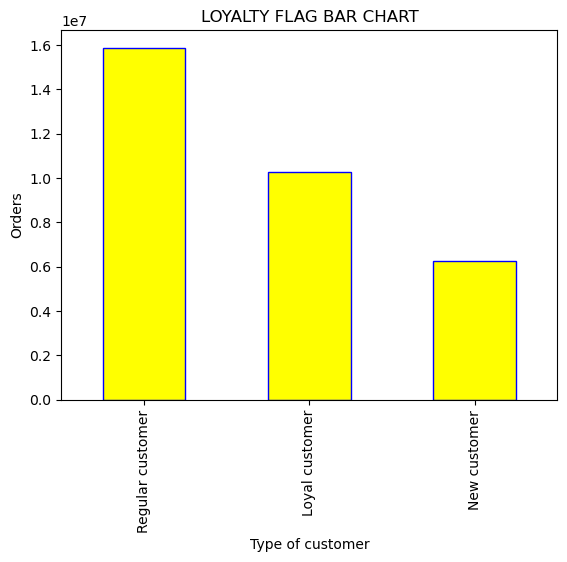

In [42]:
#Create a bar chart from the loyalty_flag column
bar_loyalty_flag = custs_ords_prods['loyalty_flag'].value_counts().plot.bar(color='yellow', edgecolor='blue')
plt.title('LOYALTY FLAG BAR CHART')
plt.xlabel('Type of customer')
plt.ylabel('Orders')

Regular customer makes the largest part among the customer types.

In [43]:
#saving the bar chart
bar_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

# STEP 5

## CREATING A LINE CHART BETWEEN ORDER HOURS PER DAY AND PRICES

Sampling has been made previously, so we need to create a smaller line chart from 30% sample group

In [45]:
line_chart_small=small[['order_hour_of_day', 'prices']]

C:\Users\gryzu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gryzu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


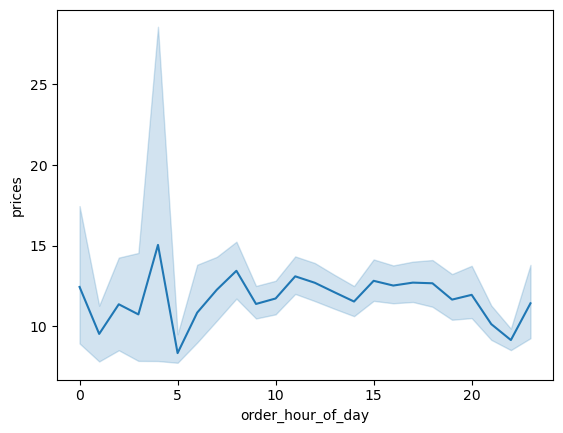

In [48]:
line_hour_of_day_ordered=sns.lineplot(data=line_chart_small, x='order_hour_of_day', y='prices')

In [49]:
#saving the line chart
line_hour_of_day_ordered.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_hour_of_day_ordered.png'))

# STEP 6

We can make the same analysis by using a smaller 30% sample

In [51]:
number_of_dependants_small=small[['number_of_dependants', 'age']]

C:\Users\gryzu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gryzu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


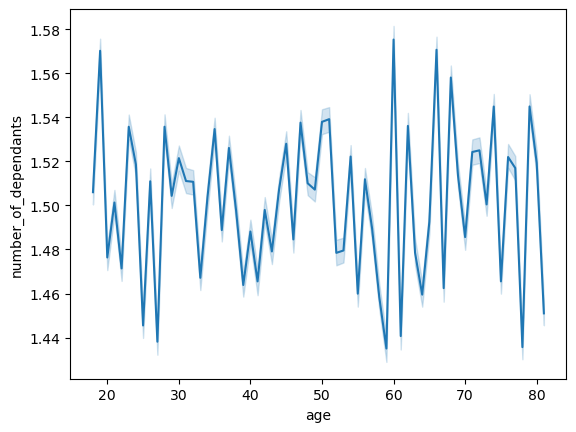

In [52]:
#Create Line Chart for the 30% sample
linechart_number_of_dependants_small=sns.lineplot(data=number_of_dependants_small, x='age', y='number_of_dependants')

In [53]:
#saving the line chart
linechart_number_of_dependants_small.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'linechart_number_of_dependants_small.png'))

There is no indication of direct positive relationship between these two variables. The line chart is very changeable. 

# STEP 7

## CREATING A SCATTERPLOT AGE/INCOME

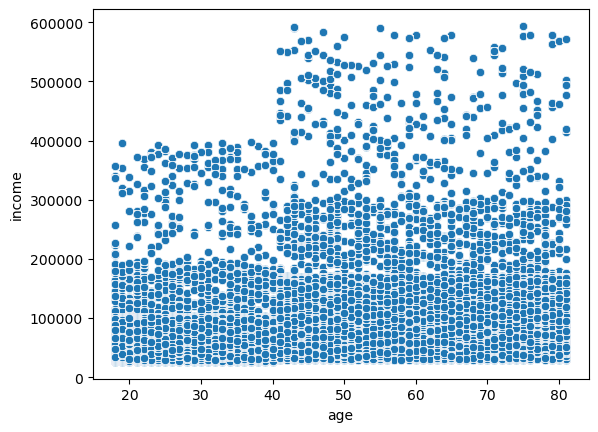

In [54]:
#Create a scatterplot to see if there is a connection between age and income
age_income_scatterplot = sns.scatterplot(x = 'age', y = 'income', data = custs_ords_prods)

On this scatterplot we can see a big density in income between 0 and 200000 for all age groups. After 200000 it is possible to see a less intensive correlations and more outliers till 40 years old. However, after observing the age more carefully, it is necessary to mention that the most correlations (dots) can be seen after 40 years old. 

In [56]:
#saving the scatterplot
age_income_scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_income_scatterplot.png'))